# Pallavi Yenigalla      ID- 2611733530

# 1. Active Learning Using Support Vector Machines

#### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set. This is a binary classification problem. 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Test Set

In [68]:
head=["variance","skewness","curtosis","entropy","class"]
df=pd.read_csv("data_banknote_authentication.txt",names=head)
df.head()
print(len(df))

1372


#### Train Set

In [69]:
df_test = df.sample(n=472)
print(len(df_test))

472


In [41]:
#df_test.head()

In [70]:
df_train= df.loc[~df.index.isin(df_test.index)]
df_train.head()
print(len(df_train))

900


#### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure. i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.1 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
svc=LinearSVC(penalty='l1',dual=False)
m=KFold(n_splits=10)
parameters={'C':[1,10]}
clf=GridSearchCV(svc,parameters,cv=m)
mainErrors = np.zeros(90)
for n in range(0,50):
    temp_DF=pd.DataFrame()
    lastArray=[] 
    newArray=df_train 
    errors=[]
    for i in range(0,90):
        tempArray=newArray.sample(n=10)
        x=[temp_DF,tempArray]
        temp_DF=pd.concat(x)
        lastArray=newArray.loc[~newArray.index.isin(tempArray.index)]
        clf.fit(temp_DF.loc[:,:'entropy'],temp_DF['class'])
        accuracy_score=clf.score(df_test.loc[:,:'entropy'],df_test['class'])
        err=1-accuracy_score
        errors.append(err)
        mainErrors[i]+=err
        #print(len(tempDF))


#### ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the margin of the SVM2 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool.Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [75]:
newDF=[]
errors=[]
clf=LinearSVC(penalty='l1',dual=False)
parameters={'C':[1,10]}
m=KFold(n_splits=10)
clf1=GridSearchCV(clf,parameters,cv=m)
mainerrors=np.zeros(90)
for p in range(0,50):
    newDF=df_train
    rdf=newDF.sample(n=10)
    newDF=newDF.loc[~newDF.index.isin(rdf.index)]
    
    for l in range(0,90):
        clf1.fit(rdf.loc[:,:'entropy'],rdf['class'])
        acc=clf1.score(df_test.loc[:,:'entropy'],df_test['class'])
        
        e=1-acc
        errors.append(e)
        mainerrors[l]+=e
        if l==89:
            continue
        y=clf1.decision_function(newDF.loc[:,:'entropy'])
        y=abs(y)
        x=y.argsort()[:10]
        finalDF=newDF.iloc[x,:]
        f=[rdf,finalDF]
        rdf=pd.concat(f)
        newDF=newDF.loc[~newDF.index.isin(finalDF.index)]
        

        


#### (c) Average the test errors for the incrementally trained 90 SVMs in 1(b)i and1(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. 

#### Averaging test errors for active and passive trained SVMs

In [86]:
pl=[]
pl[:] = [p/50 for p in mainErrors]
al = []
al[:] = [a/50 for a in mainerrors]

#### Plot between average test errors vs number of training instances that include both active and passive learning.

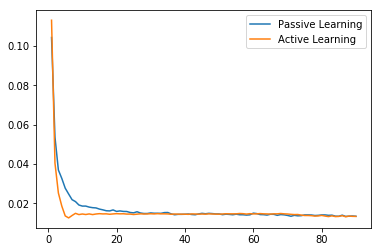

In [87]:
t=np.arange(1,91,1)
fig,ax=plt.subplots()
ax.plot(t,pl,label='Passive Learning')
ax.plot(t,al, label='Active Learning')
legend=ax.legend()
plt.show()